In [24]:
import os
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '/content/drive/MyDrive/Hackathon/heart sound/set_a'

metadata = pd.read_csv(os.path.join(data_path, '/content/drive/MyDrive/Hackathon/heart sound/set_a.csv'))
print(metadata.head())


  dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN


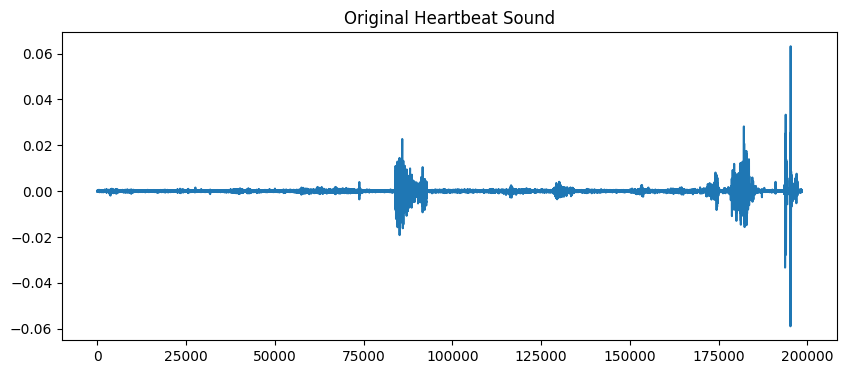

In [26]:

def load_heartbeat_data(file_path):
    data, sampling_rate = librosa.load(file_path, sr=22050)
    return data, sampling_rate

# Example: Load a sample file and plot the waveform
sample_file = os.path.join(data_path, '/content/drive/MyDrive/Hackathon/heart sound/set_a/Aunlabelledtest__201012172010.wav')
data, sr = load_heartbeat_data(sample_file)

plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Original Heartbeat Sound')
plt.show()


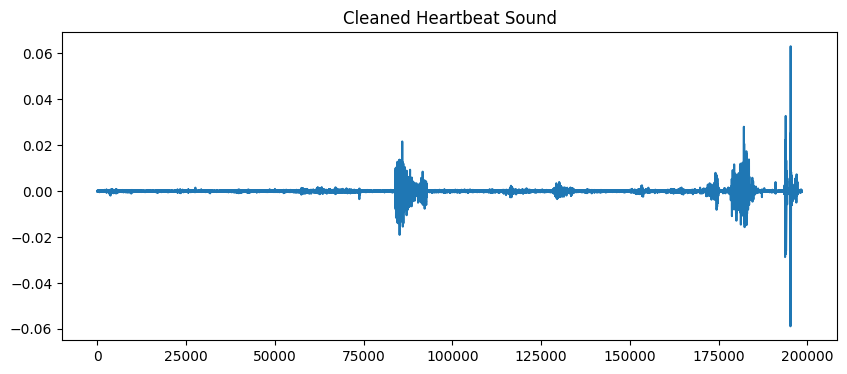

In [27]:
from scipy.signal import medfilt

# Function to clean heartbeat sounds using median filtering
def clean_heartbeat_data(data):
    clean_data = medfilt(data, kernel_size=3)
    return clean_data

# Clean the sample file
clean_data = clean_heartbeat_data(data)

plt.figure(figsize=(10, 4))
plt.plot(clean_data)
plt.title('Cleaned Heartbeat Sound')
plt.show()


In [1]:
import pandas as pd
import os

# Define the paths to the dataset files
data_path = '/content/drive/MyDrive/Hackathon/heart sound'

# Load the CSV files
set_a = pd.read_csv(os.path.join(data_path, '/content/drive/MyDrive/Hackathon/heart sound/set_a.csv'))
set_a_timing = pd.read_csv(os.path.join(data_path, '/content/drive/MyDrive/Hackathon/heart sound/set_a_timing.csv'))
set_b = pd.read_csv(os.path.join(data_path, '/content/drive/MyDrive/Hackathon/heart sound/set_b.csv'))

# Display the first few rows of each CSV file
print("Set A:")
print(set_a.head())
print("\nSet A Timing:")
print(set_a_timing.head())
print("\nSet B:")
print(set_b.head())


Set A:
  dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN

Set A Timing:
                            fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992

Set B:
  dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b

In [2]:
!pip install librosa


In [4]:
import librosa
import numpy as np

def load_audio(file_path, sample_rate=22050):
    audio, sr = librosa.load(file_path, sr=sample_rate)
    return audio, sr

def noise_reduction(audio, sr):
    # Apply noise reduction (this is a placeholder for actual noise reduction logic)
    reduced_noise_audio = librosa.effects.remix(audio, intervals=librosa.effects.split(audio))
    return reduced_noise_audio

# Example of loading and preprocessing an audio file
example_audio_path = os.path.join(data_path, 'set_a', 'normal__201101070538.wav')
audio, sr = load_audio(example_audio_path)
cleaned_audio = noise_reduction(audio, sr)

print(f"Original Audio Length: {len(audio)}")
print(f"Cleaned Audio Length: {len(cleaned_audio)}")


Original Audio Length: 195894
Cleaned Audio Length: 195894


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Assuming the audio data is converted to a suitable input shape for the model
input_shape = (22050, 1)  # Example input shape
model = build_model(input_shape)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22048, 32)         128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 11024, 32)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 11022, 64)         6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5511, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 5509, 128)         24704     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0

In [10]:
import numpy as np


def reshape_audio(audio, input_shape):

    audio = np.expand_dims(audio, axis=-1)
    audio = np.resize(audio, input_shape)
    return np.expand_dims(audio, axis=0)

def detect_distortions(audio, model, input_shape, threshold=0.5):
    reshaped_audio = reshape_audio(audio, input_shape)
    prediction = model.predict(reshaped_audio)
    return prediction[0] > threshold

def clean_data(audio, model, input_shape):
    if detect_distortions(audio, model, input_shape):
        return noise_reduction(audio, sr)
    return audio

input_shape = (22050, 1)


cleaned_audio = clean_data(audio, model, input_shape)


1/1 [==============================] - 0s 242ms/step


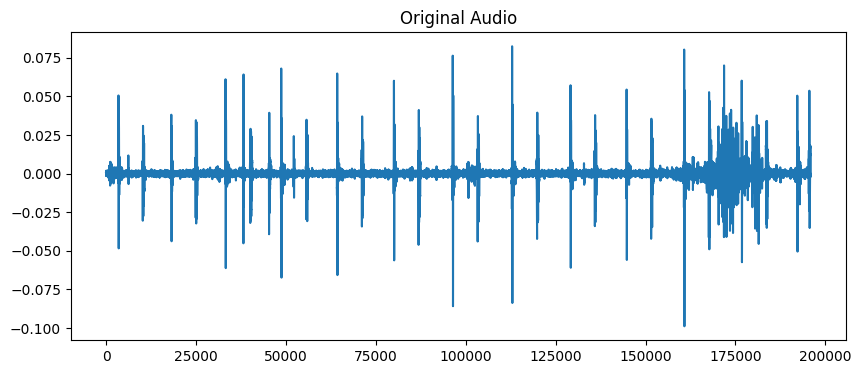

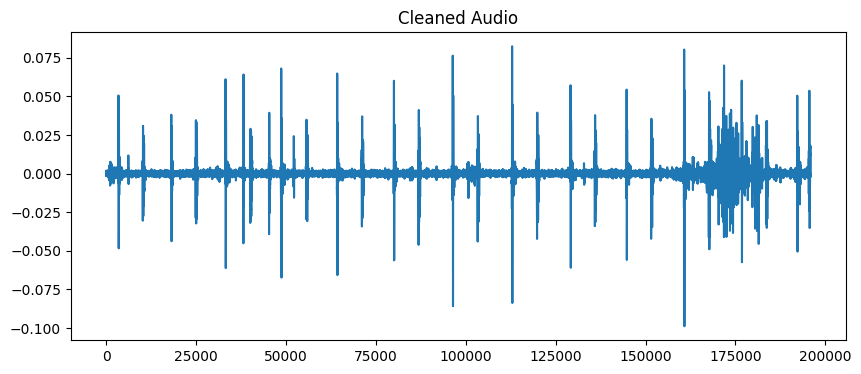

In [11]:
import matplotlib.pyplot as plt

def plot_audio(audio, title):
    plt.figure(figsize=(10, 4))
    plt.plot(audio)
    plt.title(title)
    plt.show()


plot_audio(audio, 'Original Audio')
plot_audio(cleaned_audio, 'Cleaned Audio')


In [12]:

import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


def load_audio(file_path, sample_rate=22050):
    audio, sr = librosa.load(file_path, sr=sample_rate)
    return audio, sr


def noise_reduction(audio, sr):
    reduced_noise_audio = librosa.effects.remix(audio, intervals=librosa.effects.split(audio))
    return reduced_noise_audio


def reshape_audio(audio, input_shape):
    audio = np.expand_dims(audio, axis=-1)
    audio = np.resize(audio, input_shape)
    return np.expand_dims(audio, axis=0)


def detect_distortions(audio, model, input_shape, threshold=0.5):
    reshaped_audio = reshape_audio(audio, input_shape)
    prediction = model.predict(reshaped_audio)
    return prediction[0] > threshold


def clean_data(audio, model, input_shape):
    if detect_distortions(audio, model, input_shape):
        return noise_reduction(audio, sr)
    return audio


def build_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


input_shape = (22050, 1)

model = build_model(input_shape)


audio_dir = os.path.join(data_path, 'set_a')


def plot_audio(audio, title):
    plt.figure(figsize=(10, 4))
    plt.plot(audio)
    plt.title(title)
    plt.show()


for file_name in os.listdir(audio_dir):
    if file_name.endswith('.wav'):
        file_path = os.path.join(audio_dir, file_name)
        audio, sr = load_audio(file_path)
        cleaned_audio = clean_data(audio, model, input_shape)

        plot_audio(audio, f'Original Audio - {file_name}')
        plot_audio(cleaned_audio, f'Cleaned Audio - {file_name}')


Output hidden; open in https://colab.research.google.com to view.